## Liberaries

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [394]:
olist_sales=pd.read_csv(r"Sales Olist Dataset.csv")

In [395]:
olist_sales

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,9/13/2017 8:59,9/29/2017 0:00,9/20/2017 23:43,58.9,13.29,credit_card,72.19
1,b81ef226f3fe1789b1e8b2acac839d17,delivered,4/25/2018 22:01,5/22/2018 0:00,5/9/2018 17:36,79.8,19.53,credit_card,99.33
2,53cdb2fc8bc7dce0b6741e2150273451,delivered,7/24/2018 20:41,8/13/2018 0:00,8/7/2018 15:27,118.7,22.76,boleto,141.46
3,a9810da82917af2d9aefd1278f1dcfa0,delivered,6/26/2018 11:01,7/16/2018 0:00,6/29/2018 20:32,17.0,7.39,credit_card,24.39
4,00018f77f2f0320c557190d7a144bdd3,delivered,4/26/2017 10:53,5/15/2017 0:00,5/12/2017 16:04,239.9,19.93,credit_card,259.83
...,...,...,...,...,...,...,...,...,...
118429,aaab15da689073f8f9aa978a390a69d1,unavailable,1/16/2018 14:27,2/6/2018 0:00,NaN,NaN,NaN,boleto,210.09
118430,3a3cddda5a7c27851bd96c3313412840,canceled,8/31/2018 16:13,10/1/2018 0:00,NaN,NaN,NaN,voucher,63.89
118431,a89abace0dcc01eeb267a9660b5ac126,canceled,9/6/2018 18:45,9/27/2018 0:00,NaN,NaN,NaN,voucher,107.13
118432,a69ba794cc7deb415c3e15a0a3877e69,unavailable,8/23/2017 16:28,9/15/2017 0:00,NaN,NaN,NaN,credit_card,195.91


## Exploring Data

In [396]:
olist_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   order_status                   118434 non-null  object 
 2   order_date                     118434 non-null  object 
 3   order_estimated_delivery_date  118434 non-null  object 
 4   order_delivered_customer_date  115037 non-null  object 
 5   price                          117604 non-null  float64
 6   freight_value                  117604 non-null  float64
 7   payment_type                   118431 non-null  object 
 8   payment_value                  118431 non-null  float64
dtypes: float64(3), object(6)
memory usage: 8.1+ MB


In [397]:
olist_sales.nunique()

order_id                         99441
order_status                         8
order_date                       88789
order_estimated_delivery_date      459
order_delivered_customer_date    75649
price                             5968
freight_value                     6999
payment_type                         5
payment_value                    29077
dtype: int64

In [398]:
olist_sales["order_status"].unique()

array(['delivered', 'invoiced', 'canceled', 'shipped', 'processing',
       'approved', 'unavailable', 'created'], dtype=object)

In [399]:
olist_sales.groupby('order_status').size()

order_status
approved            3
canceled          745
created             5
delivered      115038
invoiced          373
processing        375
shipped          1245
unavailable       650
dtype: int64

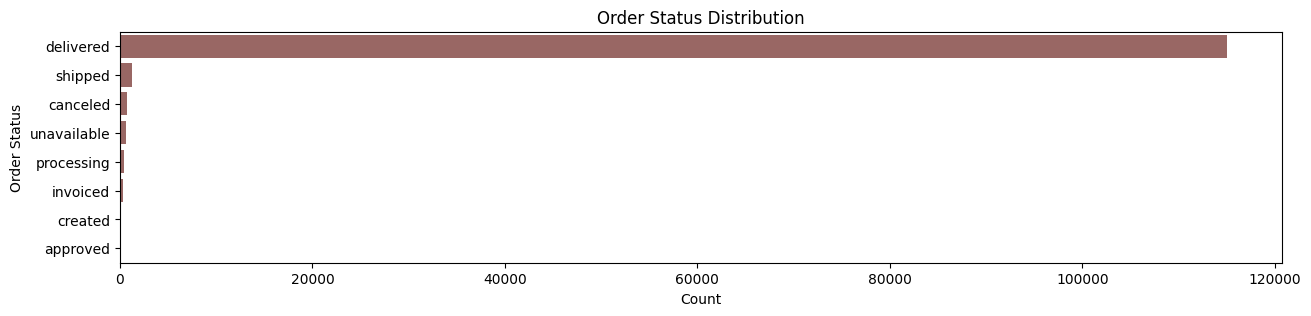

In [400]:
plt.figure(figsize=(15,3))
sns.countplot(y=olist_sales["order_status"], order = olist_sales["order_status"].value_counts().index, color="#A25F5B")
plt.title("Order Status Distribution")
plt.xlabel("Count")
plt.ylabel("Order Status")
plt.show()

In [401]:
olist_sales["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', nan,
       'not_defined'], dtype=object)

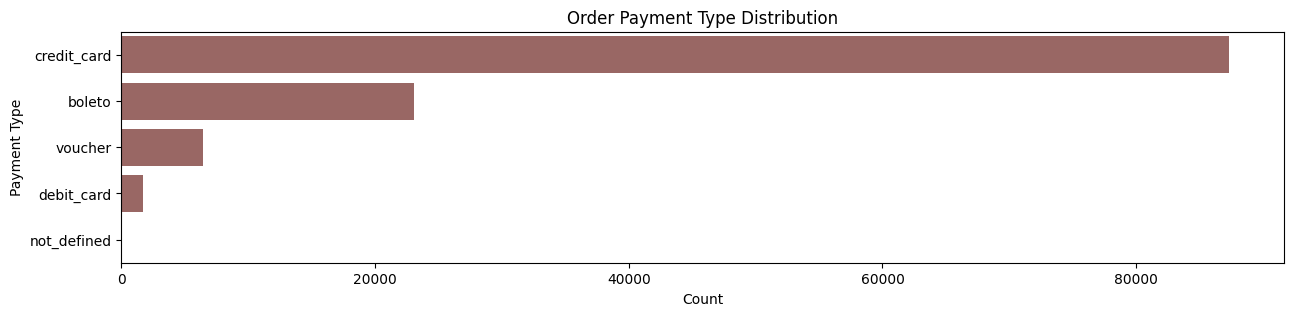

In [402]:
plt.figure(figsize=(15,3))
sns.countplot(y=olist_sales["payment_type"], order = olist_sales["payment_type"].value_counts().index, color="#A25F5B")
plt.title("Order Payment Type Distribution")
plt.xlabel("Count")
plt.ylabel("Payment Type")
plt.show()

In [403]:
olist_sales.groupby("payment_type").size()

payment_type
boleto         23037
credit_card    87286
debit_card      1698
not_defined        3
voucher         6407
dtype: int64

In [404]:
print(olist_sales.dtypes)

order_id                          object
order_status                      object
order_date                        object
order_estimated_delivery_date     object
order_delivered_customer_date     object
price                            float64
freight_value                    float64
payment_type                      object
payment_value                    float64
dtype: object


##### The data in date columns is not read as date type.

In [405]:
olist_sales.isnull().sum()

order_id                            0
order_status                        0
order_date                          0
order_estimated_delivery_date       0
order_delivered_customer_date    3397
price                             830
freight_value                     830
payment_type                        3
payment_value                       3
dtype: int64

##### There are around 830 null cells in both columns freight_value and price, 3 null cells in both payment_vaue and payment_type columns, and 3397 in order_delivered_customer_date column.

In [406]:
olist_sales[olist_sales['payment_type'].isna()]

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
82444,bfbd0f9bdef84302105ad712db648a6c,delivered,9/15/2016 12:16,10/4/2016 0:00,11/9/2016 7:47,44.99,2.83,NaN,NaN
82445,bfbd0f9bdef84302105ad712db648a6c,delivered,9/15/2016 12:16,10/4/2016 0:00,11/9/2016 7:47,44.99,2.83,NaN,NaN
82446,bfbd0f9bdef84302105ad712db648a6c,delivered,9/15/2016 12:16,10/4/2016 0:00,11/9/2016 7:47,44.99,2.83,NaN,NaN


In [407]:
olist_sales[olist_sales['payment_value'].isna()]

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
82444,bfbd0f9bdef84302105ad712db648a6c,delivered,9/15/2016 12:16,10/4/2016 0:00,11/9/2016 7:47,44.99,2.83,NaN,NaN
82445,bfbd0f9bdef84302105ad712db648a6c,delivered,9/15/2016 12:16,10/4/2016 0:00,11/9/2016 7:47,44.99,2.83,NaN,NaN
82446,bfbd0f9bdef84302105ad712db648a6c,delivered,9/15/2016 12:16,10/4/2016 0:00,11/9/2016 7:47,44.99,2.83,NaN,NaN


##### It seems that the 3 null cells are for 3 orders where the payments were not payed yet.

In [408]:
olist_sales[olist_sales['order_delivered_customer_date'].isna()].groupby('order_status').size()

order_status
approved          3
canceled        738
created           5
delivered         8
invoiced        373
processing      375
shipped        1245
unavailable     650
dtype: int64

In [409]:
olist_sales[(olist_sales['order_delivered_customer_date'].isna()) & (olist_sales['order_status']=='delivered')]

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
12740,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,11/28/2017 17:44,12/18/2017 0:00,NaN,117.30,17.53,credit_card,134.83
16151,0d3268bad9b086af767785e3f0fc0133,delivered,7/1/2018 21:14,7/24/2018 0:00,NaN,188.99,15.63,credit_card,204.62
21473,20edc82cf5400ce95e1afacc25798b31,delivered,6/27/2018 16:09,7/19/2018 0:00,NaN,45.90,9.07,credit_card,54.97
52331,2ebdfc4f15f23b91474edf87475f108e,delivered,7/1/2018 17:05,7/30/2018 0:00,NaN,139.00,19.07,credit_card,158.07
63180,2d858f451373b04fb5c984a1cc2defaf,delivered,5/25/2017 23:22,6/23/2017 0:00,NaN,179.00,15.00,credit_card,194.00
88290,e69f75a717d64fc5ecdfae42b2e8e086,delivered,7/1/2018 22:05,7/30/2018 0:00,NaN,139.00,19.07,credit_card,158.07
107426,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,6/8/2018 12:09,6/26/2018 0:00,NaN,110.99,9.13,credit_card,120.12
112893,f5dd62b788049ad9fc0526e3ad11a097,delivered,6/20/2018 6:58,7/16/2018 0:00,NaN,329.00,25.24,debit_card,354.24


##### There are around 8 orders where the order was marked as delivered but has no order_delivered_customer_date date.

In [410]:
olist_sales[olist_sales['order_delivered_customer_date'].notna()].groupby('order_status').size()

order_status
canceled          7
delivered    115030
dtype: int64

##### There are around 7 orders that were canceled after delivery to the customer.

In [411]:
olist_sales[['freight_value', 'price', 'payment_value']].corr()

,freight_value,price,payment_value
freight_value,1.000000,0.415813,0.373891
price,0.415813,1.000000,0.739501
payment_value,0.373891,0.739501,1.000000


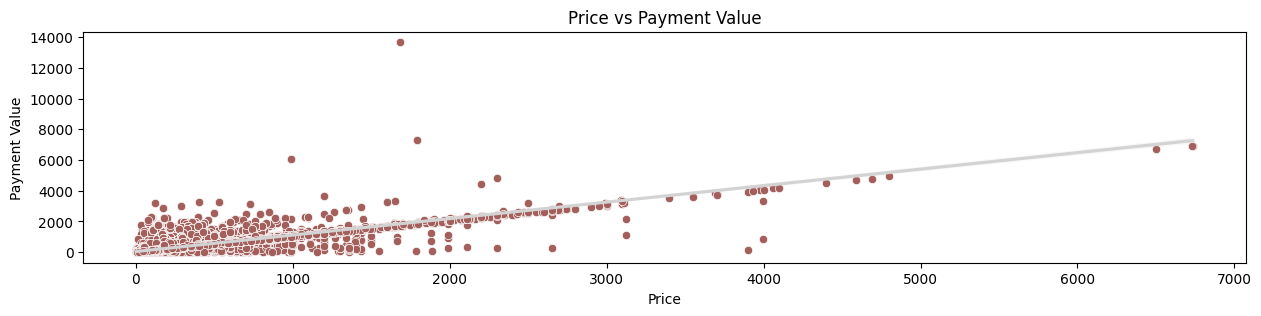

In [412]:
plt.figure(figsize=(15,3))
sns.scatterplot(x=olist_sales["price"], y=olist_sales["payment_value"], color="#A25F5B")
sns.regplot(x=olist_sales["price"], y=olist_sales["payment_value"], scatter=False, color="#D3D3D3") 
plt.title("Price vs Payment Value")
plt.xlabel("Price")
plt.ylabel("Payment Value")
plt.show()

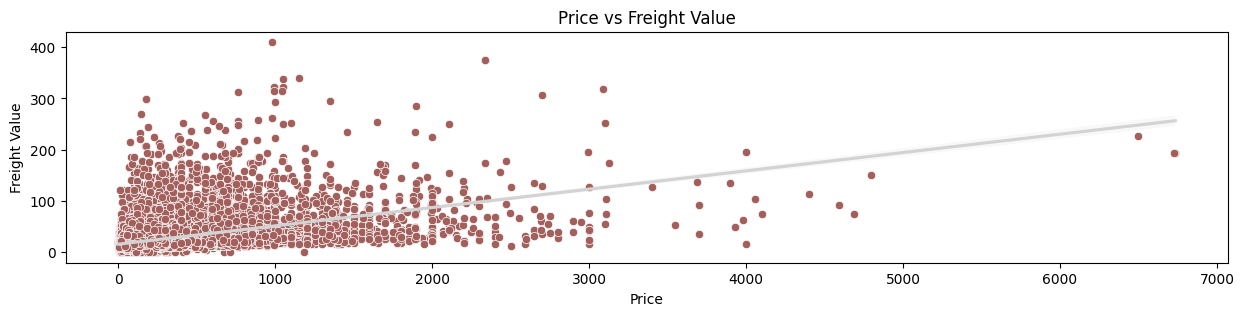

In [413]:
plt.figure(figsize=(15,3))
sns.scatterplot(x=olist_sales["price"], y=olist_sales["freight_value"], color="#A25F5B")
sns.regplot(x=olist_sales["price"], y=olist_sales["freight_value"], scatter=False, color="#D3D3D3") 
plt.title("Price vs Freight Value")
plt.xlabel("Price")
plt.ylabel("Freight Value")
plt.show()

##### The correlation indicates a strong relation between payment_value and the price, and there is also a moderate relation between price and freight_value.

In [414]:
olist_sales.describe()

,price,freight_value,payment_value
count,117604.000000,117604.000000,118431.000000
mean,120.822849,20.045551,172.849395
std,184.477367,15.861351,268.259831
min,0.850000,0.000000,0.000000
25%,39.900000,13.080000,60.860000
50%,74.900000,16.290000,108.200000
75%,134.900000,21.190000,189.245000
max,6735.000000,409.680000,13664.080000


##### Given that the mean is larger than median in price, freight_value and payment_value columns, it means that this data is skewed.

## Filling Missing Values

##### Given that the payment value is the sum of price and freight_value.

In [415]:
avg_price=olist_sales['price'].median()
avg_freight_value=olist_sales['freight_value'].median()
avg_price_ratio = avg_price/(avg_price+avg_freight_value)
avg_freight_value_ratio = avg_freight_value/(avg_price+avg_freight_value)

In [416]:
olist_sales.loc[olist_sales['price'].isna(),['price']]=olist_sales['payment_value']*avg_price_ratio
olist_sales.loc[olist_sales['freight_value'].isna(),['freight_value']]=olist_sales['payment_value']*avg_freight_value_ratio

In [417]:
olist_sales

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,9/13/2017 8:59,9/29/2017 0:00,9/20/2017 23:43,58.900000,13.290000,credit_card,72.19
1,b81ef226f3fe1789b1e8b2acac839d17,delivered,4/25/2018 22:01,5/22/2018 0:00,5/9/2018 17:36,79.800000,19.530000,credit_card,99.33
2,53cdb2fc8bc7dce0b6741e2150273451,delivered,7/24/2018 20:41,8/13/2018 0:00,8/7/2018 15:27,118.700000,22.760000,boleto,141.46
3,a9810da82917af2d9aefd1278f1dcfa0,delivered,6/26/2018 11:01,7/16/2018 0:00,6/29/2018 20:32,17.000000,7.390000,credit_card,24.39
4,00018f77f2f0320c557190d7a144bdd3,delivered,4/26/2017 10:53,5/15/2017 0:00,5/12/2017 16:04,239.900000,19.930000,credit_card,259.83
...,...,...,...,...,...,...,...,...,...
118429,aaab15da689073f8f9aa978a390a69d1,unavailable,1/16/2018 14:27,2/6/2018 0:00,NaN,172.559941,37.530059,boleto,210.09
118430,3a3cddda5a7c27851bd96c3313412840,canceled,8/31/2018 16:13,10/1/2018 0:00,NaN,52.476818,11.413182,voucher,63.89
118431,a89abace0dcc01eeb267a9660b5ac126,canceled,9/6/2018 18:45,9/27/2018 0:00,NaN,87.992510,19.137490,voucher,107.13
118432,a69ba794cc7deb415c3e15a0a3877e69,unavailable,8/23/2017 16:28,9/15/2017 0:00,NaN,160.913028,34.996972,credit_card,195.91


In [418]:
olist_sales.isnull().sum()

order_id                            0
order_status                        0
order_date                          0
order_estimated_delivery_date       0
order_delivered_customer_date    3397
price                               0
freight_value                       0
payment_type                        3
payment_value                       3
dtype: int64

##### Now there are no empty cells of no meaning.

## Handling Data Structure and Format

In [419]:
olist_sales[['order_date','order_estimated_delivery_date','order_delivered_customer_date']]= olist_sales[['order_date','order_estimated_delivery_date','order_delivered_customer_date']].apply(pd.to_datetime)

In [420]:
olist_sales.head()

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:00,2017-09-29,2017-09-20 23:43:00,58.9,13.29,credit_card,72.19
1,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:00,2018-05-22,2018-05-09 17:36:00,79.8,19.53,credit_card,99.33
2,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:00,2018-08-13,2018-08-07 15:27:00,118.7,22.76,boleto,141.46
3,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:00,2018-07-16,2018-06-29 20:32:00,17.0,7.39,credit_card,24.39
4,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:00,2017-05-15,2017-05-12 16:04:00,239.9,19.93,credit_card,259.83


In [421]:
olist_sales.tail()

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
118429,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:00,2018-02-06,NaT,172.559941,37.530059,boleto,210.09
118430,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:00,2018-10-01,NaT,52.476818,11.413182,voucher,63.89
118431,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:00,2018-09-27,NaT,87.992510,19.137490,voucher,107.13
118432,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:00,2017-09-15,NaT,160.913028,34.996972,credit_card,195.91
118433,5fabc81b6322c8443648e1b21a6fef21,unavailable,2017-10-10 10:50:00,2017-10-23,NaT,110.037866,23.932134,boleto,133.97


In [422]:
olist_sales.dtypes

order_id                                 object
order_status                             object
order_date                       datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
price                                   float64
freight_value                           float64
payment_type                             object
payment_value                           float64
dtype: object

In [423]:
print(olist_sales[['order_date','order_estimated_delivery_date','order_delivered_customer_date']].isna().sum())

order_date                          0
order_estimated_delivery_date       0
order_delivered_customer_date    3397
dtype: int64


In [424]:
print(olist_sales[['order_date','order_estimated_delivery_date','order_delivered_customer_date']].min())

order_date                      2016-09-04 21:15:00
order_estimated_delivery_date   2016-09-30 00:00:00
order_delivered_customer_date   2016-10-11 13:46:00
dtype: datetime64[ns]


In [425]:
print(olist_sales[['order_date','order_estimated_delivery_date','order_delivered_customer_date']].max())

order_date                      2018-10-17 17:30:00
order_estimated_delivery_date   2018-11-12 00:00:00
order_delivered_customer_date   2018-10-17 13:22:00
dtype: datetime64[ns]


##### This means the date columns are now all consistent and has no out-of-bounds dates.

## Saving The Cleaned Data

In [426]:
olist_sales.to_csv("cleaned_olist_sales.csv",index=False)

## Performing Reconciliation

#### Sales Performance:

Total Revenue from the successfully delivered orders:-

In [427]:
olist_sales_delivered = olist_sales[(olist_sales['order_status']=='delivered') & (olist_sales['order_delivered_customer_date'].notna())]
olist_sales_delivered

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:00,2017-09-29,2017-09-20 23:43:00,58.90,13.29,credit_card,72.19
1,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:00,2018-05-22,2018-05-09 17:36:00,79.80,19.53,credit_card,99.33
2,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:00,2018-08-13,2018-08-07 15:27:00,118.70,22.76,boleto,141.46
3,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:00,2018-07-16,2018-06-29 20:32:00,17.00,7.39,credit_card,24.39
4,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:00,2017-05-15,2017-05-12 16:04:00,239.90,19.93,credit_card,259.83
...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,delivered,2018-04-23 13:57:00,2018-05-18,2018-05-10 22:56:00,299.99,43.41,boleto,343.40
117600,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-14 10:26:00,2018-08-01,2018-07-23 20:31:00,350.00,36.53,boleto,386.53
117601,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-23 17:07:00,2017-11-10,2017-10-28 12:22:00,99.90,16.95,credit_card,116.85
117602,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:00,2017-08-25,2017-08-16 21:59:00,55.99,8.72,credit_card,64.71


In [428]:
no_orders_delivered = olist_sales_delivered.shape[0]
print(f"Number of orders succesfully delivered is {no_orders_delivered}.")

Number of orders succesfully delivered is 115030.


In [429]:
total_revenue = round(olist_sales_delivered['price'].sum()+olist_sales_delivered['freight_value'].sum())
print(f"Total Revenue of successfully delivered orders = {format(total_revenue,",")}.")

Total Revenue of successfully delivered orders = 16,112,784.


In [430]:
total_payment_delivered = round(olist_sales_delivered['payment_value'].sum())
print(f"Total payment of successfully delivered orders = {format(total_payment_delivered,",")}.")

Total payment of successfully delivered orders = 19,774,782.


In [431]:
revenue_payment_diff = total_payment_delivered - total_revenue
print(f"There is about {format(revenue_payment_diff,",")} overpayment. ")

There is about 3,661,998 overpayment. 


Expected Revenue:-

In [432]:
olist_sales_approved = olist_sales[olist_sales['order_status'].isin(['delivered', 'invoiced', 'shipped', 'processing', 'approved'])]
olist_sales_approved 

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:00,2017-09-29,2017-09-20 23:43:00,58.900000,13.290000,credit_card,72.19
1,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:00,2018-05-22,2018-05-09 17:36:00,79.800000,19.530000,credit_card,99.33
2,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:00,2018-08-13,2018-08-07 15:27:00,118.700000,22.760000,boleto,141.46
3,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:00,2018-07-16,2018-06-29 20:32:00,17.000000,7.390000,credit_card,24.39
4,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:00,2017-05-15,2017-05-12 16:04:00,239.900000,19.930000,credit_card,259.83
...,...,...,...,...,...,...,...,...,...
117602,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:00,2017-08-25,2017-08-16 21:59:00,55.990000,8.720000,credit_card,64.71
117603,fffe41c64501cc87c801fd61db3f6244,delivered,2018-06-09 17:00:00,2018-06-28,2018-06-14 17:56:00,43.000000,12.790000,credit_card,55.79
117787,a68ce1686d536ca72bd2dadc4b8671e5,shipped,2016-10-05 01:47:00,2016-12-01,NaT,63.844468,13.885532,boleto,77.73
118093,2ce9683175cdab7d1c95bcbb3e36f478,invoiced,2016-10-05 21:03:00,2016-11-25,NaT,59.992280,13.047720,boleto,73.04


In [433]:
no_orders_approved = olist_sales_approved.shape[0]
print(f"Number of orders approved is {no_orders_approved}.")

Number of orders approved is 117034.


In [434]:
expected_revenue = round(olist_sales_approved['price'].sum()+olist_sales_approved['freight_value'].sum())
print(f"Expected Revenue of approved orders = {format(expected_revenue,",")}.")

Expected Revenue of approved orders = 16,452,210.


 Canceled Orders:-

In [435]:
olist_sales_canceled = olist_sales[olist_sales['order_status']=="canceled"]
olist_sales_canceled

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
69,5d9c5817e278892b7498d90bfa28ade8,canceled,2018-04-26 08:13:00,2018-05-10,NaT,110.900000,34.180000,credit_card,290.16
70,5d9c5817e278892b7498d90bfa28ade8,canceled,2018-04-26 08:13:00,2018-05-10,NaT,110.900000,34.180000,credit_card,290.16
369,00310b0c75bb13015ec4d82d341865a4,canceled,2018-08-15 14:29:00,2018-08-29,NaT,39.900000,15.380000,credit_card,55.28
987,61792c6272346d7f4b7c5b1747df7b1a,canceled,2017-03-08 11:51:00,2017-04-10,NaT,24.990000,24.350000,credit_card,49.34
1162,00ae7a8b4936674ebb701d4a23719a79,canceled,2018-05-09 14:14:00,2018-05-17,NaT,27.900000,9.260000,credit_card,37.16
...,...,...,...,...,...,...,...,...,...
118414,5a00b4d35edffc56b825c3646a99ba9d,canceled,2017-07-02 15:38:00,2017-07-25,NaT,129.060610,28.069390,credit_card,157.13
118419,227c804e2a44760671a6a5697ea549e4,canceled,2017-09-28 15:02:00,2017-10-16,NaT,230.145630,50.054370,credit_card,280.20
118424,e49e7ce1471b4693482d40c2bd3ad196,canceled,2018-08-07 11:16:00,2018-08-10,NaT,44.698520,9.721480,voucher,54.42
118430,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:00,2018-10-01,NaT,52.476818,11.413182,voucher,63.89


In [436]:
no_orders_canceled = olist_sales_canceled.shape[0]
print(f"Number of orders canceled is {no_orders_canceled}.")

Number of orders canceled is 745.


In [437]:
no_orders = olist_sales.shape[0]
percentage_canceled_orders = (no_orders_canceled/no_orders)*100
print(f"Percentage of canceled orders: {percentage_canceled_orders:.2f}%")

Percentage of canceled orders: 0.63%


 Late Deliveries:-

In [438]:
olist_sales_late_deliveries = olist_sales[olist_sales['order_delivered_customer_date']>olist_sales['order_estimated_delivery_date']]
print(f"Number of orders that arrived late are {olist_sales_late_deliveries.shape[0]}.")

Number of orders that arrived late are 9027.


In [439]:
olist_sales[(olist_sales['order_status'] == "canceled" )&(olist_sales['order_delivered_customer_date']>olist_sales['order_estimated_delivery_date'])]

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value
12422,1950d777989f6a877539f53795b4c3c3,canceled,2018-02-19 19:48:00,2018-03-09,2018-03-21 22:03:00,29.99,14.1,credit_card,44.09


Given that from data exploration we found that there are 7 orders canceled after delivery, It seems that only one of them was delivered late.

In [440]:
no_orders_delievered = olist_sales[olist_sales['order_delivered_customer_date'].notna()].shape[0]
no_orders_delivered_late = olist_sales_late_deliveries.shape[0]
percentage_late_delivery = (no_orders_delivered_late / no_orders_delievered) *100
print(f"Percentage of late deliveries: {percentage_late_delivery:.2f}%")

Percentage of late deliveries: 7.85%


In [441]:
olist_sales['late_delivery']= olist_sales.apply( lambda x: "late" if x['order_delivered_customer_date']>x['order_estimated_delivery_date'] else "on time", axis = 1)
olist_sales

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value,late_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:00,2017-09-29,2017-09-20 23:43:00,58.900000,13.290000,credit_card,72.19,on time
1,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:00,2018-05-22,2018-05-09 17:36:00,79.800000,19.530000,credit_card,99.33,on time
2,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:00,2018-08-13,2018-08-07 15:27:00,118.700000,22.760000,boleto,141.46,on time
3,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:00,2018-07-16,2018-06-29 20:32:00,17.000000,7.390000,credit_card,24.39,on time
4,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:00,2017-05-15,2017-05-12 16:04:00,239.900000,19.930000,credit_card,259.83,on time
...,...,...,...,...,...,...,...,...,...,...
118429,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:00,2018-02-06,NaT,172.559941,37.530059,boleto,210.09,on time
118430,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:00,2018-10-01,NaT,52.476818,11.413182,voucher,63.89,on time
118431,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:00,2018-09-27,NaT,87.992510,19.137490,voucher,107.13,on time
118432,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:00,2017-09-15,NaT,160.913028,34.996972,credit_card,195.91,on time


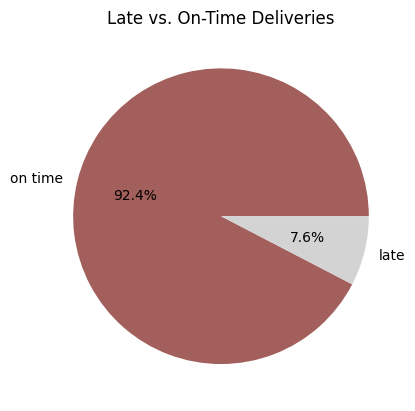

In [442]:
delivery_status = olist_sales['late_delivery'].value_counts()
plt.pie(delivery_status, labels = delivery_status.index, autopct='%1.1f%%', colors = ("#A25F5B","#D3D3D3"))
plt.title("Late vs. On-Time Deliveries")
plt.show()

#### Payment Accuracy

In [443]:
total_expected_payment = round(olist_sales['price'].sum()+olist_sales['freight_value'].sum())
print(f"Total expected payment = {total_revenue: ,}.")

Total expected payment =  16,112,784.


In [444]:
total_payment = olist_sales['payment_value'].sum()
print(f"Total Payment = {total_payment: ,.0f}")

Total Payment =  20,470,727


In [445]:
payment_diff = total_payment - total_expected_payment
print(f"There is about {payment_diff : ,.0f} overpayment.")

There is about  3,741,448 overpayment.


Given the overpayment from both delivered and other non-deliveried orders, there is a chance there is an overpayment for some transactions.

In [446]:
olist_sales['payment_diff']=round((olist_sales['price']+olist_sales['freight_value'])-olist_sales['payment_value'])
olist_sales

,order_id,order_status,order_date,order_estimated_delivery_date,order_delivered_customer_date,price,freight_value,payment_type,payment_value,late_delivery,payment_diff
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:00,2017-09-29,2017-09-20 23:43:00,58.900000,13.290000,credit_card,72.19,on time,0.0
1,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:00,2018-05-22,2018-05-09 17:36:00,79.800000,19.530000,credit_card,99.33,on time,0.0
2,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:00,2018-08-13,2018-08-07 15:27:00,118.700000,22.760000,boleto,141.46,on time,0.0
3,a9810da82917af2d9aefd1278f1dcfa0,delivered,2018-06-26 11:01:00,2018-07-16,2018-06-29 20:32:00,17.000000,7.390000,credit_card,24.39,on time,0.0
4,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:00,2017-05-15,2017-05-12 16:04:00,239.900000,19.930000,credit_card,259.83,on time,0.0
...,...,...,...,...,...,...,...,...,...,...,...
118429,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:00,2018-02-06,NaT,172.559941,37.530059,boleto,210.09,on time,0.0
118430,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:00,2018-10-01,NaT,52.476818,11.413182,voucher,63.89,on time,0.0
118431,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:00,2018-09-27,NaT,87.992510,19.137490,voucher,107.13,on time,0.0
118432,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:00,2017-09-15,NaT,160.913028,34.996972,credit_card,195.91,on time,0.0


In [447]:
olist_sales['payment_accuracy']= olist_sales['payment_diff'].apply(lambda x: "overpayment" if x > 0 else ("underpayment" if x < 0 else "accurate payment"))
olist_sales.groupby('payment_accuracy').size()

payment_accuracy
accurate payment    86906
overpayment          7560
underpayment        23968
dtype: int64

##### This indicates that  7560 orders had inaccurate payments.

In [448]:
accurate_payment = olist_sales[olist_sales['payment_accuracy']== "accurate payment"].shape[0]
overpayment = olist_sales[olist_sales['payment_accuracy']== "overpayment "].shape[0]
underpayment = olist_sales[olist_sales['payment_accuracy']== "underpayment"].shape[0]
accuracy_percentage = (accurate_payment/(accurate_payment+inaccurate_payment+underpayment))*100
print(f"Percentage of payment accuracy: {accuracy_percentage:.2f}%")

Percentage of payment accuracy: 73.38%


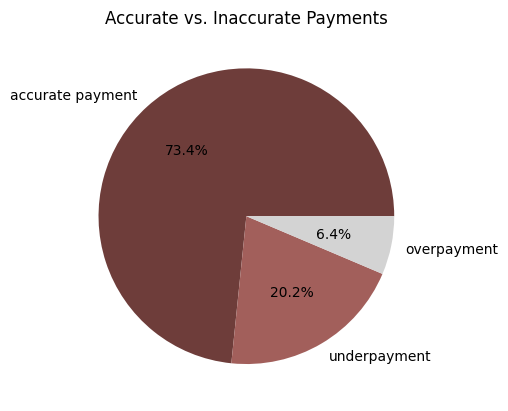

In [449]:
payment_accuracy = olist_sales['payment_accuracy'].value_counts()
plt.pie(payment_accuracy, labels = payment_accuracy.index, autopct='%1.1f%%', colors = ("#6E3D3A","#A25F5B","#D3D3D3"))
plt.title("Accurate vs. Inaccurate Payments")
plt.show()

### Saving Cleaned Data with custom columns

In [450]:
olist_sales.to_csv("custom_cleaned_olist_sales.csv",index=False)